# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tobigs/week_5 KNN&Clustering, SVM/KNN&Clustering/과제/Clustering/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

###EDA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

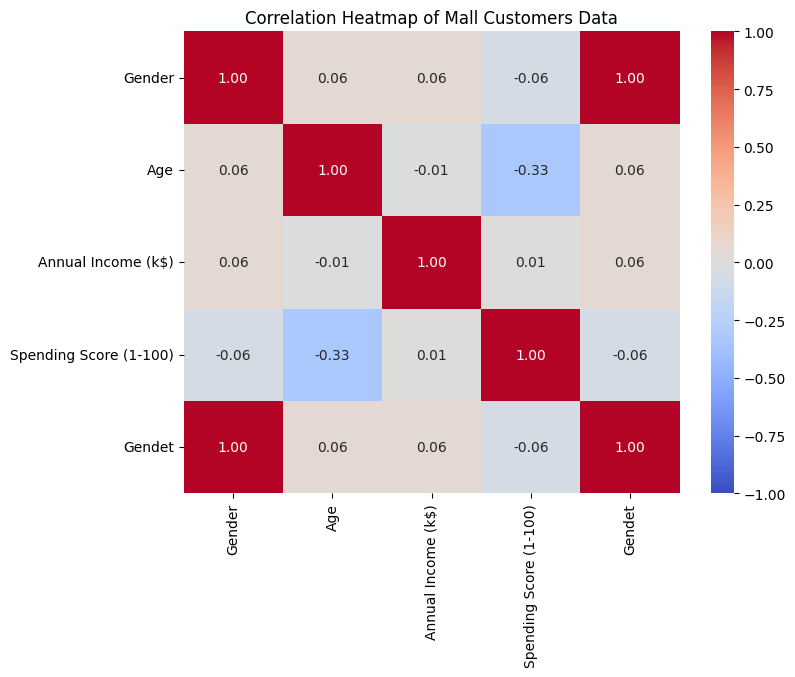

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#성별 컬럼 수치형으로 변경
df['Gendet'] = df['Gender'].astype(int)

#상관관계 히트맵 그리기
corr = df.corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Mall Customers Data')
plt.show()

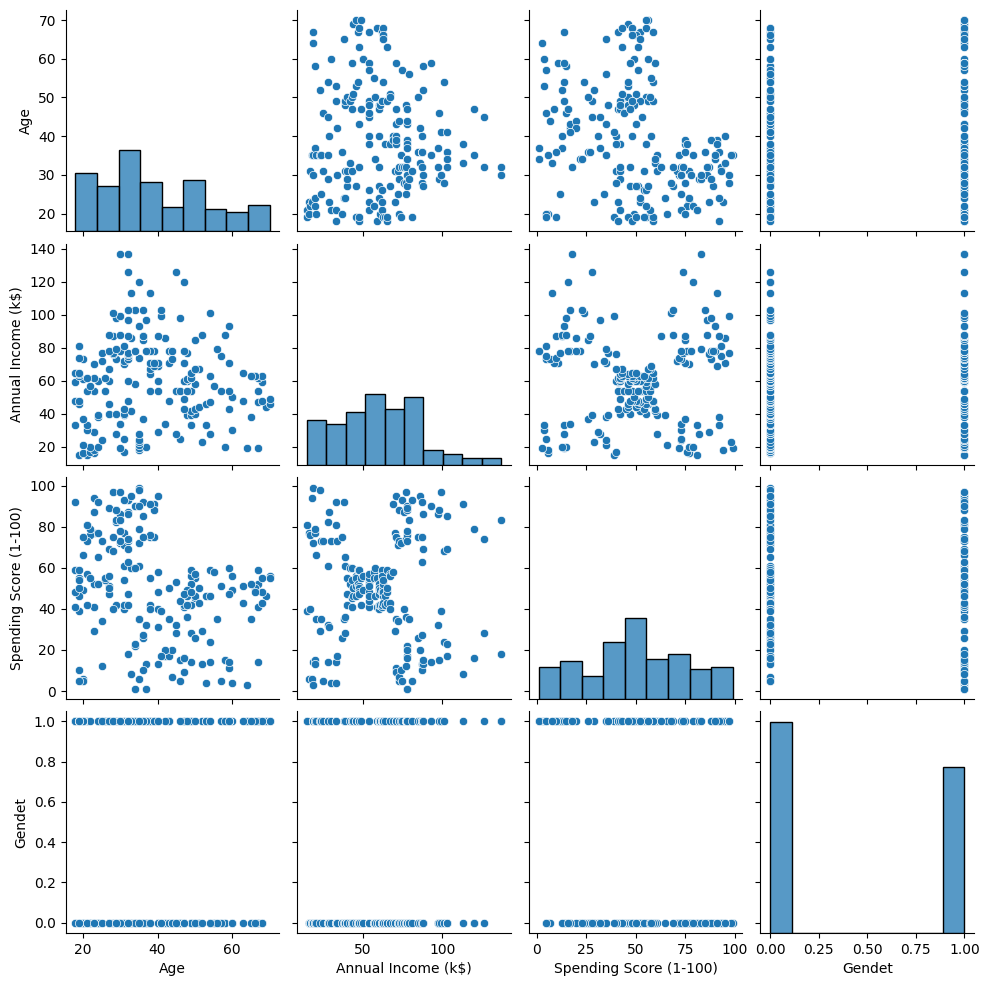

In [11]:
#수치형 변수 선형성 확인

# 산점도 행렬 생성
sns.pairplot(df.drop(['Gender'], axis=1))
plt.show()

## 2. Clustering

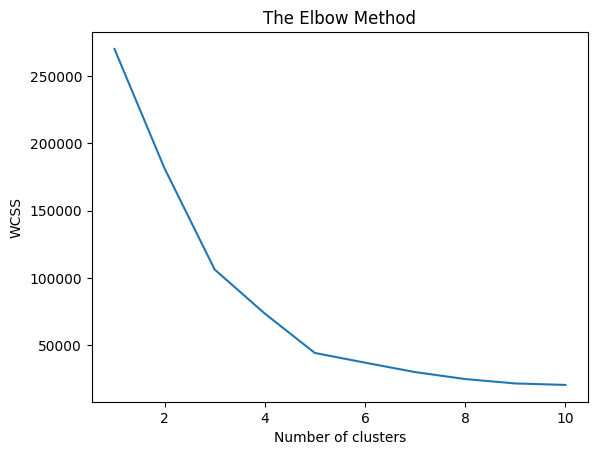

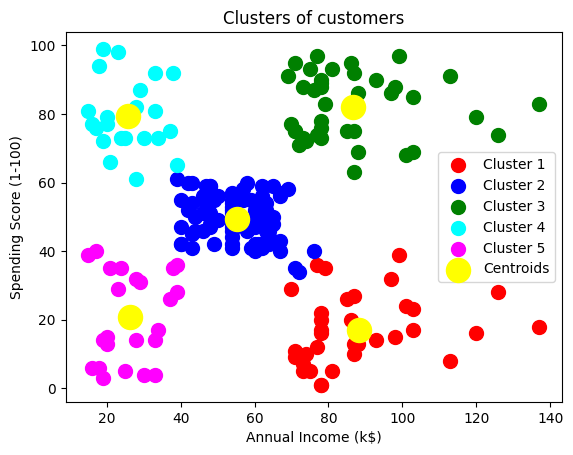

In [14]:
from sklearn.cluster import KMeans

# 군집 분석을 위한 특성 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 엘보우 방법을 사용하여 적절한 클러스터 수 결정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# WCSS 그래프로 나타내기
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 적절한 클러스터 수를 선택하여 K-Means 클러스터링 수행

#최적의 k값
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 클러스터링 결과 시각화
plt.scatter(X['Annual Income (k$)'][y_kmeans == 0], X['Spending Score (1-100)'][y_kmeans == 0], s=100, c='red', label='Cluster 1')
plt.scatter(X['Annual Income (k$)'][y_kmeans == 1], X['Spending Score (1-100)'][y_kmeans == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X['Annual Income (k$)'][y_kmeans == 2], X['Spending Score (1-100)'][y_kmeans == 2], s=100, c='green', label='Cluster 3')
plt.scatter(X['Annual Income (k$)'][y_kmeans == 3], X['Spending Score (1-100)'][y_kmeans == 3], s=100, c='cyan', label='Cluster 4')
plt.scatter(X['Annual Income (k$)'][y_kmeans == 4], X['Spending Score (1-100)'][y_kmeans == 4], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 3. Evaluation

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.554
